<h1 style='text-align: center;'>DNA Sequencing</h1>
<h2 style='text-align: center;'>Pilkyu Lee<h2>

##What is DNA?

Deoxyribonucleic acid, commonly known as DNA, functions as the genetic instruction manual in humans and the vast majority of other organisms. Nearly every cell in a person's body houses the same DNA. The larger proportion of this genetic material is found in the cell nucleus, hence it is often referred to as nuclear DNA. However, a small fraction also exists in the mitochondria, the cell's powerhouse, where it is known as mitochondrial DNA or mtDNA.

DNA carries its information in a coded form, made up of four chemical bases: adenine (A), guanine (G), cytosine (C), and thymine (T). Human DNA comprises approximately 3 billion of these bases. Intriguingly, over 99 percent of these bases are the same across all individuals. The distinct order, or sequence, of these bases forms the data needed for an organism's development and maintenance, much like how the arrangement of letters creates meaningful words and sentences in a language. DNA bases couple with each other, with A binding to T and C to G, to form units called base pairs.

One of the remarkable attributes of DNA is its capability to self-replicate, meaning it can make exact copies of itself. Every strand of the DNA double helix can serve as a pattern for duplicating the sequence of bases. This replication process is indispensable during cell division, as each new cell must have an exact replica of the DNA present in the original cell.

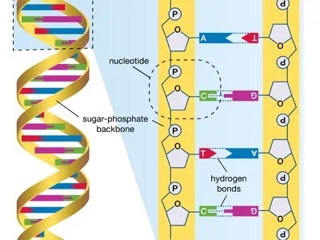

##Motivation

Human DNA is composed of 3 billion base pairs, with 99 percent of these being identical across all humans. This means that only 1 percent of these base pairs account for the differences among individuals. Yet, this seemingly small 1 percent represents a significant 10 million base pairs. What kind of information and insights can these 10 million base pairs offer us? Moreover, given the ability of DNA to replicate itself during cell division, can we predict DNA replication and potentially gain future insights from this 1 percent of DNA? Recent news highlights how DNA testing can predict the risk of developing conditions like type 2 diabetes. <a href="https://www.diabetes.co.uk/news/2023/may/new-dna-test-can-better-predict-risk-of-developing-type-2-diabetes.html">(News Link)</a> The initial step towards this kind of predictive understanding is DNA sequencing.

##DNA Sequencing

DNA sequencing theory is an expansive field of study that establishes the analytical foundation for determining the order of specific nucleotides in a DNA strand, a process referred to as DNA sequencing. This area covers practical elements such as the planning and optimization of sequencing projects (dubbed "strategic genomics"), forecasting project results, troubleshooting experimental outcomes, discerning factors such as sequence bias and the effects of software processing algorithms, and comparing various sequencing methods against each other.

The theory of DNA sequencing specifically deals with the physical processes involved in sequencing DNA and should not be conflated with theories that analyze the sequences that result from this process. It's a highly interdisciplinary field, incorporating elements of mathematics, biology, and systems engineering. As such, the study of DNA sequencing theory often occurs within the broader context of computational biology.

In [1]:
from Bio import SeqIO
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import os

In [2]:
for sequence in SeqIO.parse('./data/example_dna.fa', "fasta"):
    print("ID: " + sequence.id)
    print("Sequence: " + sequence.seq)
    print("Length: ", len(sequence))

ID: ENST00000435737.5
Sequence: ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
Length:  390
ID: ENST00000419127.5
Sequence: ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCC

The dna sample is a brief example of DNA sequence. The Bio.SeqIO.parse() takes a file handle and format name, and returns a SeqRecord iterator. The SeqRecord object used in Biopython to hold a sequence with identifiers (ID and name), description and optionally annotation and sub-features.

Information about Bio.SeqIO: <a href="https://biopython.org/wiki/SeqIO">LINK</a>

Information about SeqRecord: <a href="https://biopython.org/wiki/SeqRecord">LINK</a>

The first ID 'ENST00000435737.5' is likely a unique identifier for a specific DNA sequence. The convention of this ID suggests it's from the Ensembl database, a genome database project.
The sequence ATGTTTCGCATCACCAAC... that follows is the actual DNA sequence associated with that ID.
The number 390 is the length of this DNA sequence, meaning it is composed of 390 nucleotide bases.
The next ID ENST00000419127.5, DNA sequence, and length, follow the same pattern and are for a different DNA sequence in the file. This DNA sequence is longer, composed of 2154 nucleotide bases.

Each set of ID, sequence, and length corresponds to a DNA sequence entry in your FASTA file. The ID is a unique identifier for the sequence, the sequence is the actual DNA sequence, and the length is the count of nucleotide bases in the sequence.

##Encoding DNA sequence data

In [3]:
def string_to_array (seq_string):
    seq_string = seq_string.lower()
    seq_string = re.sub('[^acgt]', 'n', seq_string)
    seq_string = np.array(list(seq_string))
    return seq_string

label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a', 'c', 'g', 't', 'z']))

LabelEncoder()

The function named 'string_to_array' transforms a sequence string into a NumPy array, along with a label encoder that comprises the DNA sequence alphabet - "a", "c", "g", and "t", as well as an additional character, "n", to represent any other elements.

In [4]:
def encoder (arr):
    encoded_int = label_encoder.transform(arr)
    encoded_float = encoded_int.astype(float)
    encoded_float[encoded_float == 0] = 0.25
    encoded_float[encoded_float == 1] = 0.5
    encoded_float[encoded_float == 2] = 0.75
    encoded_float[encoded_float == 3] = 1.
    encoded_float[encoded_float == 4] = 0.0
    
    return encoded_float

##One Hot Encoding DNA Sequence
One-hot encoding is a method utilized to convert categorical variables into numerical form for use in machine learning models. For example, "CGAT" is translated to [1,0,0,0], [0,1,0,0], [0,0,0,1], [0,0,1,0]. The translated arrays will be returned into 2-dimensional arrays. 

In [5]:
def one_hot_encoder(seq_string):
    encoded_int = label_encoder.transform(seq_string)
    onehot = OneHotEncoder(sparse_output=False, dtype=int)
    encoded_int = encoded_int.reshape(len(encoded_int), 1)
    onehot = onehot.fit_transform(encoded_int)
    onehot = np.delete(onehot, -1, 1)
    return onehot

##k-mer counting
None of the previously mentioned methods yield vectors of uniform length, a requirement when providing data to classification or regression algorithms. Therefore, with these methods, one often has to adopt strategies such as sequence truncation or padding with "n" or "0" to achieve vectors of a consistent length.

DNA and protein sequences can be perceived as life's own language, encoding crucial instructions and functions for molecules found in all living organisms. This linguistic analogy can be extended further: the genome is akin to a book, subsequences (like genes and gene families) represent sentences and chapters, while k-mers and peptides act as words, and nucleotide bases along with amino acids form the alphabets. Given this striking similarity, it seems logical to apply natural language processing (NLP) techniques to the natural language of DNA and protein sequences.

The approach we adopt here is straightforward and simple. We start by taking the extensive biological sequence and decomposing it into overlapping "words" of k-mer length.

In the field of bioinformatics, k-mers refer to substrings of a biological sequence that are k units in length. Generally, the term k-mer is used to denote all subsequences within a sequence that have a length of k. For instance, the sequence AGAT would consist of four 1-mers (A, G, A, and T), three 2-mers (AG, GA, AT), a pair of 3-mers (AGA and GAT), and a single 4-mer (AGAT). More information about k-mer can be found <a href="https://en.wikipedia.org/wiki/K-mer">Here</a>.

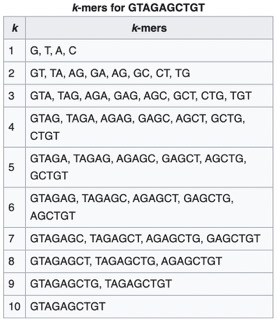

In [6]:
def kmer_func (seq, size):
    return [seq[x: x + size].lower() for x in range(len(seq) - size + 1)]
seq = 'GTAGAGCTGT'
kmer_func(seq, size=7)

['gtagagc', 'tagagct', 'agagctg', 'gagctgt']

The kmer function successfully returned the k-mer of 'GTAGAGCTGT' for the size of 7, which is listed on the above k-mer table.

In [7]:
k_mer = kmer_func(seq, size=7)
joined_kmer = ' '.join(k_mer)
joined_kmer

'gtagagc tagagct agagctg gagctgt'

Both the length of the 'word' and the degree of overlap are adjustable. This flexibility enables to decide the significance of DNA sequence information and vocabulary size for the specific application. For instance, if I opt for words of length 6 and considering there are 4 letters, it ends up with a vocabulary comprising 4096 potential words. Subsequently, I can construct a bag-of-words model, much like you would in Natural Language Processing (NLP).

##Objective
Develop a classification model trained on human DNA sequences that can anticipate a gene family based on the DNA sequence of the coding sequence. To evaluate the model's performance, I will utilize the DNA sequences of humans, dogs, and chimpanzees, and compare their prediction accuracies.

Gene families comprise related genes sharing a common ancestry. The members of these families could be either paralogs or orthologs. Paralogous genes are those with similar sequences originating from the same species, whereas orthologous genes have comparable sequences but exist in different species.

The dataset includes DNA sequences from humans, dogs, and chimpanzees.

##Load Human DNA data

In [8]:
human_dna = pd.read_table('./data/human.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Class of Human DNA')

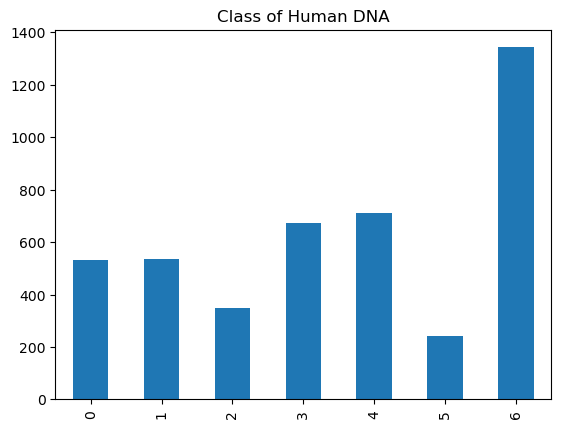

In [9]:
counts = human_dna['class'].value_counts().sort_index()
counts.plot(kind='bar')
plt.title("Class of Human DNA")

##Load Chimpanzee DNA data

In [10]:
chimp_dna = pd.read_table('./data/chimpanzee.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Text(0.5, 1.0, 'Class of Chimpanzee DNA')

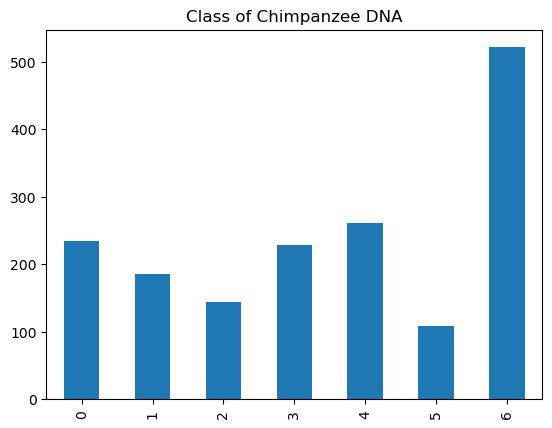

In [11]:
counts = chimp_dna['class'].value_counts().sort_index()
counts.plot(kind='bar')
plt.title("Class of Chimpanzee DNA")

##Load Dog DNA data

In [12]:
dog_dna = pd.read_table('./data/dog.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Text(0.5, 1.0, 'Class of Dog DNA')

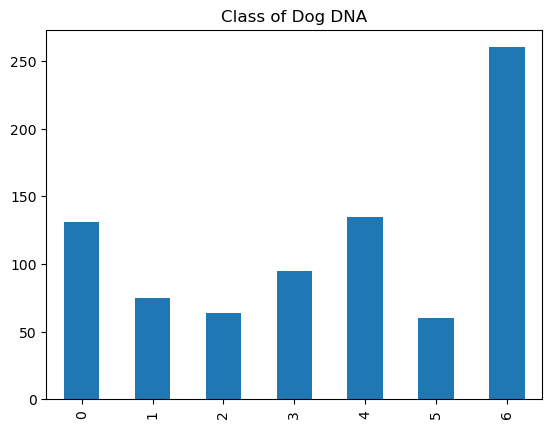

In [13]:
counts = dog_dna['class'].value_counts().sort_index()
counts.plot(kind='bar')
plt.title("Class of Dog DNA")

DNA of Human, Dog and Chimpanzee is distributed to 7 classes. Class 0 is G protien coupled receptors, Class 1 is Tyrosine kinase, Class 2 is Tyrosine phosphatase, Class 3 is Synthetase, Class 4 is Synthase, Class 5 is Ion Channel, and Class 6 is Transcription Factor.

In [14]:
human_dna['k_mer'] = human_dna.apply(lambda x: kmer_func(x['sequence'], size=6), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['k_mer'] = chimp_dna.apply(lambda x: kmer_func(x['sequence'], size=6), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['k_mer'] = dog_dna.apply(lambda x: kmer_func(x['sequence'], size=6), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

In [15]:
human_dna.head()

,class,k_mer
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [16]:
chimp_dna.head()

,class,k_mer
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [17]:
dog_dna.head()

,class,k_mer
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


Sequences of human, chimpanzee, and dog are converted to possible overlapping k-mers of the length 6 (hexamers).

In [18]:
human_text_list = list(human_dna['k_mer'])
for cls in range(len(human_text_list)):
    human_text_list[cls] = ' '.join(human_text_list[cls])
human_word = human_dna.iloc[:, 0].values

chimp_text_list = list(chimp_dna['k_mer'])
for cls in range(len(chimp_text_list)):
    chimp_text_list[cls] = ' '.join(chimp_text_list[cls])
chimp_word = chimp_dna.iloc[:, 0].values

dog_text_list = list(dog_dna['k_mer'])
for cls in range(len(dog_text_list)):
    dog_text_list[cls] = ' '.join(dog_text_list[cls])
dog_word = dog_dna.iloc[:, 0].values

In [19]:
print(human_word)
print(chimp_word)

[4 4 3 ... 6 6 6]
[4 4 4 ... 6 3 3]


In [20]:
cv = CountVectorizer(ngram_range=(4,4))
x_human = cv.fit_transform(human_text_list)
x_chimp = cv.fit_transform(chimp_text_list)
x_dog = cv.fit_transform(dog_text_list)
print(x_human.shape)
print(x_chimp.shape)
print(x_dog.shape)

(4380, 232414)
(1682, 229684)
(820, 227149)


Thus, in the case of humans, I have transformed 4380 genes into feature vectors of uniform length, based on 4-gram k-mer (of length 6) counts. Similarly, for chimpanzees and dogs, I have generated the same number of features, but for 1682 and 820 genes respectively.

Having understood how to convert our DNA sequences into uniform length numerical vectors using k-mer counts and n-grams, I can proceed to develop a classification model capable of predicting the function of a DNA sequence based solely on the sequence itself.

For this, I plan to use the human data to train the model, reserving 20% of this data to test the model's performance. I can then assess the model's ability to generalize by attempting to predict sequence functions in other species, specifically chimpanzees and dogs.

Subsequently, I will divide the human dataset into training and testing sets and construct a simple multinomial naive Bayes classifier.

While it might be beneficial to tune some parameters and develop a model with varying n-gram sizes, for now, I will proceed with an n-gram size of 4 and a model alpha of 0.1.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_human, human_word, test_size=0.2, random_state=42)
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

##Predictions on the reserved human test set to evaluate the model's performance on data it hasn't encountered before

In [22]:
print("Confusion Matrix: Human test DNA Sequence\n")
y_pred_human = classifier.predict(x_test)
confusion_matrix = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred_human, name='Predicted'))
print(confusion_matrix)

def calculate_metrics(y_test, y_predicted):
    accuracy_metric = accuracy_score(y_test, y_predicted)
    precision_metric = precision_score(y_test, y_predicted, average='weighted')
    recall_metric = recall_score(y_test, y_predicted, average='weighted')
    f1_metric = f1_score(y_test, y_predicted, average='weighted')
    return accuracy_metric, precision_metric, recall_metric, f1_metric

accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_human)
print(f"accuracy = {accuracy:.3f} \nprecision = {precision:.3f} \nrecall = {recall:.3f} \nf1 = {f1:.3f}")

Confusion Matrix: Human test DNA Sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


With the model of human DNA, I will compare Chimpanzee and Dog.

In [23]:
x_train_chimp, x_test_chimp, y_train_chimp, y_test_chimp = train_test_split(x_chimp, chimp_word, test_size=0.2, random_state=42)
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train_chimp, y_train_chimp)

print("Confusion Matrix: Chimpanzee test DNA Sequence\n")
y_pred_chimp = classifier.predict(x_test_chimp)
confusion_matrix_chimp = pd.crosstab(pd.Series(y_test_chimp, name='Actual'), pd.Series(y_pred_chimp, name='Predicted'))
print(confusion_matrix)
accuracy, precision, recall, f1 = calculate_metrics(y_test_chimp, y_pred_chimp)
print(f"accuracy = {accuracy:.3f} \nprecision = {precision:.3f} \nrecall = {recall:.3f} \nf1 = {f1:.3f}")

Confusion Matrix: Chimpanzee test DNA Sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.914 
precision = 0.920 
recall = 0.914 
f1 = 0.911


In [24]:
x_train_dog, x_test_dog, y_train_dog, y_test_dog = train_test_split(x_dog, dog_word, test_size=0.2, random_state=42)
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train_dog, y_train_dog)

print("Confusion Matrix: Dog test DNA Sequence\n")
y_pred_dog = classifier.predict(x_test_dog)
confusion_matrix_dog = pd.crosstab(pd.Series(y_test_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted'))
print(confusion_matrix)
accuracy, precision, recall, f1 = calculate_metrics(y_test_dog, y_pred_dog)
print(f"accuracy = {accuracy:.3f} \nprecision = {precision:.3f} \nrecall = {recall:.3f} \nf1 = {f1:.3f}")

Confusion Matrix: Dog test DNA Sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.695 
precision = 0.785 
recall = 0.695 
f1 = 0.678


##Conclusion
The classification model demonstrates a commendable performance when evaluated using human data, indicating its ability to accurately predict gene function based solely on DNA sequences in humans. Interestingly, it also shows a high level of accuracy when applied to Chimpanzee data. This is likely because humans and chimpanzees share a significant amount of genetic material due to their close evolutionary relationship, which means the DNA sequences in both species are quite similar.

However, the model's performance isn't as robust when it comes to dog data. The likely reason for this is that dogs, in terms of evolutionary biology, are more distant from humans than chimpanzees. Therefore, their DNA sequences diverge more from human sequences, making it more challenging for a model trained predominantly on human data to accurately predict gene function. This highlights the importance of considering genetic diversity and evolutionary relationships when training and applying such models. It suggests that for more accurate cross-species predictions, models might need to be trained on a wider variety of species data or adapted specifically for the species in question.


##Bibliography
<a href="https://medium.com/mlearning-ai/apply-machine-learning-algorithms-for-genomics-data-classification-132972933723">Apply Machine Learning Algorithms for Genomics Data Classification</a>

<a href="https://www.frontiersin.org/articles/10.3389/fbioe.2020.01032/full">Review on the Application of Machine Learning Algorithms in the Sequence Data Mining of DNA</a>

<a href="https://medlineplus.gov/genetics/understanding/basics/dna/">What is DNA?</a>

<a href="https://www.yourgenome.org/facts/what-is-dna-replication/">What is DNA replication?</a>

<a href="https://biopython-tutorial.readthedocs.io/en/latest/notebooks/05%20-%20Sequence%20Input%20and%20Output.html">Biopython Tutorial</a>

<a href="https://en.wikipedia.org/wiki/DNA_sequencing_theory#:~:text=DNA%20sequencing%20theory%20is%20the,otherwise%20known%20as%20DNA%20sequencing.">DNA sequencing theory</a>

<a href="https://en.wikipedia.org/wiki/K-mer">k-mer</a>